In [59]:
#import necessary package when it is required.
#making index column as year instead of number and it is not our data 
import pandas as pd
import numpy as np
data_df = pd.read_csv("bordeaux.csv",index_col="year")

In [60]:
#viewing head of data and predicting the price of wine using seasons
data_df.head()

,price,summer,har,sep,win,age
year,,,,,,
1952,37.0,17.1,160,14.3,600,40
1953,63.0,16.7,80,17.3,690,39
1955,45.0,17.1,130,16.8,502,37
1957,22.0,16.1,110,16.2,420,35
1958,18.0,16.4,187,19.1,582,34


In [61]:
#viewing tail data 
data_df.tail(20)

,price,summer,har,sep,win,age
year,,,,,,
1972,10.0,15.0,158,14.6,536,20
1973,16.0,17.1,123,17.9,376,19
1974,11.0,16.3,184,16.2,574,18
1975,30.0,16.9,171,17.2,572,17
1976,25.0,17.6,247,16.1,418,16
1977,11.0,15.6,87,16.8,821,15
1978,27.0,15.8,51,17.4,763,14
1979,21.0,16.2,122,17.3,717,13
1980,14.0,16.0,74,18.4,578,12


In [62]:
#predicting NaN prices using our model with KNN
#Making use of datas available until 1980 and this is our training data

data_df.describe()

,price,summer,har,sep,win,age
count,27.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,28.814815,16.715789,135.500000,17.392105,609.421053,19.631579
std,20.956066,0.781726,67.429944,1.439854,131.370866,11.336192
min,10.000000,15.000000,38.000000,14.300000,376.000000,1.000000
25%,14.000000,16.225000,86.250000,16.425000,535.250000,10.250000
50%,22.000000,16.700000,119.000000,17.300000,586.500000,19.500000
75%,35.000000,17.100000,171.000000,18.400000,713.500000,28.750000
max,100.000000,18.700000,292.000000,20.400000,845.000000,40.000000


In [63]:
#predicting 11 years price using the given data
data_df.shape

(38, 6)

In [64]:
#spliting into training and testing 
#trainig data :1980 and testing 1981:
data_train=data_df.loc[:1980].copy()
data_test=data_df.loc[1981:].copy()
#making use of log for our price prediction to reduce the complexity
data_train["log(price)"] = np.log(data_train["price"])
data_train.head()


,price,summer,har,sep,win,age,log(price)
year,,,,,,,
1952,37.0,17.1,160,14.3,600,40,3.610918
1953,63.0,16.7,80,17.3,690,39,4.143135
1955,45.0,17.1,130,16.8,502,37,3.806662
1957,22.0,16.1,110,16.2,420,35,3.091042
1958,18.0,16.4,187,19.1,582,34,2.890372


<AxesSubplot:xlabel='win', ylabel='age'>

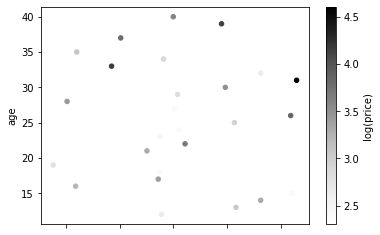

In [65]:
#let's consider 2 features for out training data ie winter and summer
import matplotlib.cm as cm
data_train.plot.scatter(x="win",y="age",c="log(price)")

In [66]:
#when temperature is higher the prices goes up
#normalise the data using zscore
X_train=data_train[["win","age"]]
y_train=data_train["log(price)"]
X_train_mean=X_train.mean()
X_train_sd=X_train.std()
#z-SCORE
X_train_st=(X_train-X_train_mean)/X_train_sd


  

In [67]:
X_train_st

,win,age
year,,
1952,-0.065156,1.796523
1953,0.632329,1.675257
1955,-0.824640,1.432727
1957,-1.460127,1.190196
1958,-0.204653,1.068931
1959,-0.956387,0.947666
1960,1.198068,0.826400
1961,1.717307,0.705135
1962,0.686578,0.583870


In [68]:
 #making new observation from 1986 
 x_new = data_test.loc[1986,["win","age"]]
 x_new_st = (x_new-X_train_mean)/X_train_sd
 x_new_st

win   -0.351900
age   -2.326497
dtype: float64

In [69]:
#Calculating Euclidean distances until 1986 in training data using broadcasting
dists=np.sqrt(((X_train_st-X_new_st)**2).sum(axis=1))
dists

year
1952    2.083530
1953    2.179760
1955    1.761725
1957    1.826077
1958    1.344016
1959    1.353111
1960    1.901864
1961    2.291936
1962    1.347253
1963    0.810897
1964    1.381768
1965    0.576150
1966    2.023856
1967    1.201912
1968    0.390655
1969    0.099709
1970    0.479215
1971    0.256247
1972    0.415285
1973    1.521488
1974    0.612022
1975    0.730353
1976    1.402204
1977    2.227868
1978    1.900427
1979    1.705263
1980    1.338326
dtype: float64

In [70]:
#sorting the first 6 nearest neighbours
i_nearest = dists.sort_values().index[:6]
i_nearest

Int64Index([1969, 1971, 1968, 1972, 1970, 1965], dtype='int64', name='year')

In [71]:
#these data samples are closer to samples of 1986
data_train.loc[i_nearest]


,price,summer,har,sep,win,age,log(price)
year,,,,,,,
1969,12.0,16.5,244,16.6,575,23,2.484907
1971,27.0,16.8,112,16.9,551,21,3.295837
1968,11.0,16.2,292,16.4,610,24,2.397895
1972,10.0,15.0,158,14.6,536,20,2.302585
1970,40.0,16.7,89,18.0,622,22,3.688879
1965,11.0,15.4,267,14.8,602,27,2.397895


In [72]:
x_new
#few values of win are far because age values are closer

win    563.0
age      6.0
Name: 1986, dtype: float64

In [73]:
#predicted price for 1986 using six nearest neighbours
y_train.loc[i_nearest[:6]].mean()

2.7613331014161755

In [74]:
#using sk learn packages
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 


scaler = StandardScaler()
X_train_st=scaler.fit_transform(X_train)
X_new_st=scaler.transform(pd.DataFrame([x_new]))
y_train=data_train['log(price)']

 

In [75]:
#comparing the accuracy of predicted score using sk learn packages
model=KNeighborsRegressor(n_neighbors=6)
model.fit(X=X_train_st, y= y_train)
model.predict(X = X_new_st)

array([2.83402222])

In [77]:
# the accuracy scores of both model seems slightly off.
#Model performs better in scikit learn package.

In [84]:
X_train_st.shape


(27, 2)

In [87]:
nei = model.kneighbors_graph()

In [89]:
#identifying the graph and connection using sparse graph via adjacency matrix
nei.toarray()

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.],
